In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("googleplaystore.csv")

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [45]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [46]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084000e+04
mean,4.193338,4.441529e+05
std,0.537431,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,19.000000,7.815831e+07


In [47]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [48]:
df.drop([10472],inplace = True)

In [49]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [50]:
def impute_median(series):
     return series.fillna(series.median())

In [12]:
df['Rating']   = df['Rating'].transform(impute_median)

In [13]:
df["Current Ver"].fillna(str(df["Current Ver"].mode().values[0]), inplace = True)

In [15]:
df["Android Ver"].fillna(str(df["Android Ver"].mode().values[0]), inplace = True)

In [16]:
df["Type"].fillna(str(df["Type"].mode().values[0]), inplace = True)

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [42]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


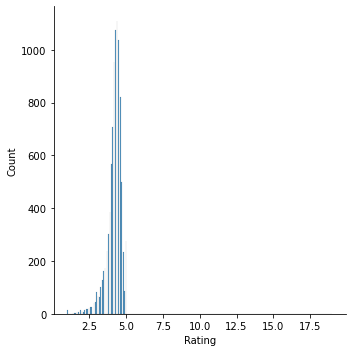

In [43]:

sns.displot(df,x ='Rating')

In [52]:
grp = df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

In [53]:
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

Text(0, 0.5, 'ratings')

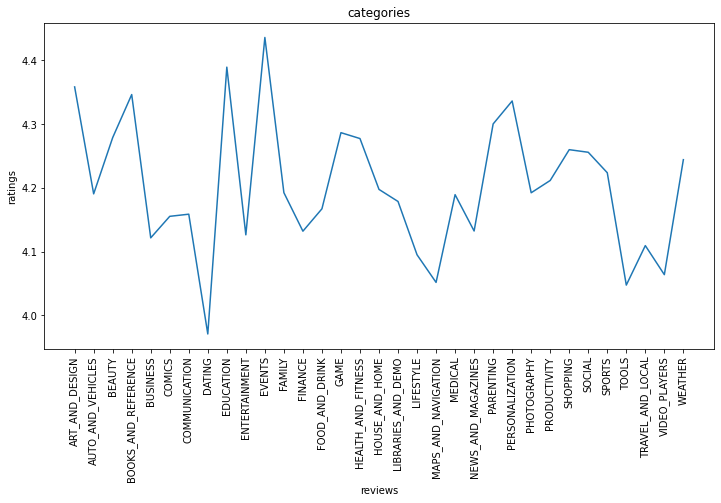

In [54]:
plt.figure(figsize =(12,6))
plt.plot(x );
plt.xticks(rotation=90)
plt.title("categories")
plt.xlabel("reviews")
plt.ylabel('ratings')



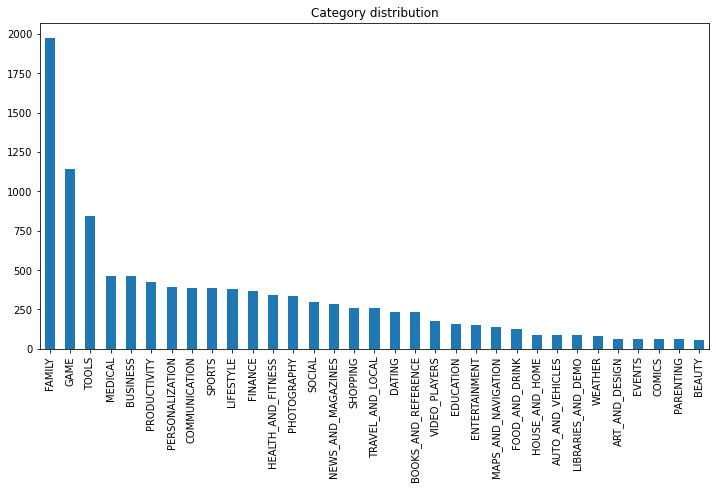

In [60]:
plt.figure(figsize=(12,6));
plt.title('Category distribution');
df.Category.value_counts().plot(kind='bar');

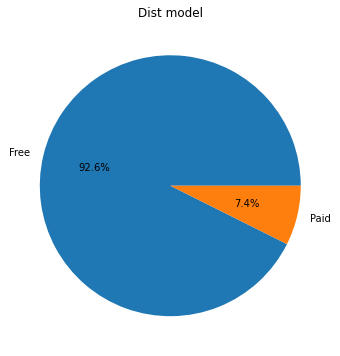

In [64]:
Dist_method = df['Type'].value_counts();

plt.figure(figsize=(12,6));
plt.title('Dist model');
plt.pie(Dist_method, labels=Dist_method.index, autopct='%1.1f%%');